<a href="https://colab.research.google.com/github/Jaacunamatata/git-started/blob/jose/Conway_game_of_life.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conway's Game of Life
From Wikipedia: "It is a zero-player game,[2][3] meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine."

# The Rules

Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent.

**Underpopulation:**
Any live cell with fewer than two live neighbours dies, as if by underpopulation.

**Living:**
Any live cell with two or three live neighbours lives on to the next generation.

**Overpopulation:**
Any live cell with more than three live neighbours dies, as if by overpopulation.

**Reproduction:**
Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.




Great examples: https://www.youtube.com/watch?v=C2vgICfQawE

## Introduction

This is code is based on Yair's Mau implementation of the Game of Life:
https://yairmau.com/tutorials/python/

## The code

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as manimation
from IPython.display import HTML
from base64 import b64encode


def life(X, steps):
    """
     Conway's Game of Life.
     - X, matrix with the initial state of the game.
     - steps, number of generations.
    """
    def roll_it(x, y):
        # rolls the matrix X in a given direction
        # x=1, y=0 left;  x=-1, y=0 right;
        return np.roll(np.roll(X, y, axis=0), x, axis=1)

    for _ in range(steps):
        # count the number of neighbours
        # the universe is considered toroidal
        Y = roll_it(1, 0) + roll_it(0, 1) + \
            roll_it(-1, 0) + roll_it(0, -1) + \
            roll_it(1, 1) + roll_it(-1, -1) + \
            roll_it(1, -1) + roll_it(-1, 1)
        # game of life rules
        X = np.logical_or(np.logical_and(X, Y == 2), Y == 3)
        X = X.astype(int)
        yield X


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


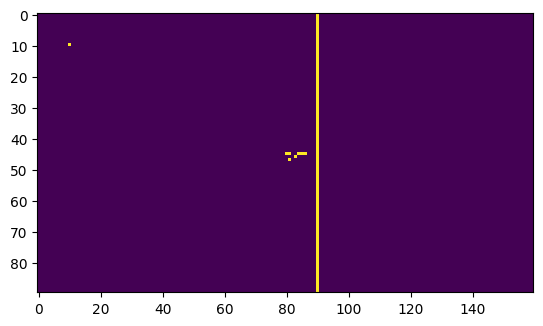

In [ ]:
dimensions = (90, 160)  # height, width
X = np.zeros(dimensions)  # Y by X dead cells
middle_y = int(dimensions[0] / 2)
middle_x = int(dimensions[1] / 2)

N_iterations = 600

#the initial condition (states) will determine the evolution of the system

##TODO: play with the initial conditions (X)

# Example of initial condition: acorn
# http://www.conwaylife.com/w/index.php?title=Acorn
X[middle_y, middle_x:middle_x+2] = 1
X[middle_y, middle_x+4:middle_x+7] = 1
X[middle_y+1, middle_x+3] = 1
X[middle_y+2, middle_x+1] = 1
X[10,10]=1
X[100:110,90:100]=1
X[0:110,90]=1

print(X)
plt.imshow(X)
plt.show()

In [ ]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Game of life', artist='Acorn initial condition')
writer = FFMpegWriter(fps=10, metadata=metadata)

fig = plt.figure()
fig.patch.set_facecolor('black')
with writer.saving(fig, "game_of_life.mp4", 300):  # last argument: dpi
    plt.spy(X, origin='lower')
    plt.axis('off')
    writer.grab_frame()
    plt.clf()
    for i, x in enumerate(life(X, N_iterations)):
        plt.title("iteration: {:03d}".format(i + 1))
        plt.spy(x, origin='lower')
        plt.axis('off')
        writer.grab_frame()
        plt.clf()

<Figure size 640x480 with 0 Axes>

In [ ]:
#you should see the file game_of_life.mp4
!ls

game_of_life.mp4  sample_data


In [ ]:
def show_video(video_path, video_width = 600):

  video_file = open(video_path, "r+b").read()

  video_url = f"data:video/mp4;base64,{b64encode(video_file).decode()}"
  return HTML(f"""<video width={video_width} controls><source src="{video_url}"></video>""")

show_video("game_of_life.mp4")
